<h1 style="color:blue; text-align:center">Basics of Scikit-Learn</h1><br/><br/>

<img src='http://scikit-learn.org/dev/_static/ml_map.png'><br/><br/>

### Thought Process (steps involved)

**1. Import an estimator**

**2. Create features matrix X : array-like, shape [n_samples, n_features] and target vector** 

**3. Fit the model to your data by calling the fit() method of the model instance after setting hyper parameters** 
    
   - Hyperparameter in a model is a configuration that is external to the model. 
    
   - Hyper parameters' values cannot be estimated from data. 
    
**4. Apply the model to new data**

**5. Evaluate model performance**

"Many models have important parameters which cannot be directly estimated from the data. For example, in the K-nearest neighbor classification model … This type of model parameter is referred to as a tuning parameter because there is no analytical formula available to calculate an appropriate value."— Page 64-65, Applied Predictive Modeling, 2013 <br/><br/>

### Let's just start with simple linear regression

In [457]:
# Create some simple data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [458]:
np.random.seed(0)
x = np.random.random(20)
x

array([ 0.5488135 ,  0.71518937,  0.60276338,  0.54488318,  0.4236548 ,
        0.64589411,  0.43758721,  0.891773  ,  0.96366276,  0.38344152,
        0.79172504,  0.52889492,  0.56804456,  0.92559664,  0.07103606,
        0.0871293 ,  0.0202184 ,  0.83261985,  0.77815675,  0.87001215])

In [459]:
print x.ndim
print x.shape

1
(20L,)


### Create a relationship between target (y) and predictor (x)
#### y_values = intercept + coefficient * x_values + random_noise <br/>

In [460]:
y = 3 * x + 2 + np.random.randn(20)
y
#X.squeeze() returns the input array, but with all or a subset of the dimensions of length 1 removed.

array([ 5.14051958,  3.94040984,  4.12135783,  2.78055381,  0.71797458,
        4.59130093,  4.17719783,  3.93315398,  7.16074291,  1.69595888,
        4.42093363,  3.39950091,  5.2369129 ,  6.24614868,  2.3680556 ,
        2.63955042,  1.17286944,  2.51706307,  3.9865581 ,  4.76638541])

In [461]:
print y.ndim
print y.shape

1
(20L,)


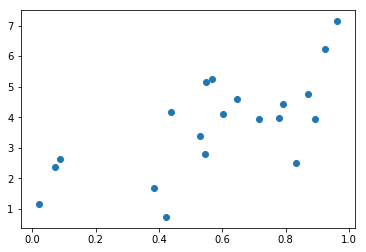

In [462]:
plt.scatter(x, y)
plt.show()

#### step-1 **Import an estimator**

In [463]:
# import estimator(model class)
from sklearn.linear_model import LinearRegression

#### step-2 **Create features matrix X : array-like, shape [n_samples, n_features] and target vector** 

In [464]:
x.shape

(20L,)

In [465]:
# create feature matrix and target vector
# make it a matrix of size [n_samples, n_features] 
X = x[:, np.newaxis]
X.shape

(20L, 1L)

#### step-3 Fit the model to your data by calling the fit() method of the model instance after setting hyper parameters

In [466]:
# Tune hyper parameter; intercept = True
my_model = LinearRegression(fit_intercept=True)

In [467]:
my_model.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

#### step-4 Apply the model to new data
    - once you fit a model you get access to some internal computations
    - they are known as model parameters
    

In [468]:
# coeficient (or slope)
# y = mx + c
# m slope; c intercept
round(my_model.coef_,3)

3.935

In [469]:
# intercept
my_model.intercept_

1.4622907890393395

##### learned equation<br/>

##### y_predicted = 3.935*(X)+ 1.462
#### y_actual : y = 3 * x + 2 + np.random.randn(20)

##### Scikit-Learn does not provide tools to draw conclusions from internal model parameters themselves as for ML the focus is on predictions 

#### step-4 (continued..)
- use predict() method of the api

In [470]:
# predict on initial values
y_pred = my_model.predict(X)
y_pred

array([ 3.62182323,  4.27649748,  3.83411119,  3.60635776,  3.12933483,
        4.00382681,  3.18415763,  4.97133841,  5.25421824,  2.97109914,
        4.57765856,  3.54344537,  3.69749573,  5.10443143,  1.74181137,
        1.80513685,  1.54184839,  4.738576  ,  4.52426855,  4.88571139])

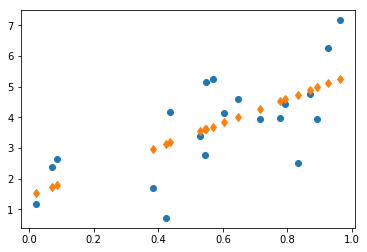

In [472]:
plt.plot(X, y, 'o')
plt.plot(X, y_pred,'d')
plt.show()

##### 5. Evaluation
- goodness of fit

In [ ]:
# simple evaluation using goodness of fit
# R-squared
from sklearn.metrics import r2_score

In [473]:
r2_score(y,y_pred)

0.46752494572004177

In [474]:
# make predictions
# get new Xs
x_new = np.random.random(20)
X_new = x_new[:, np.newaxis]
X_new

array([[ 0.66676672],
       [ 0.67063787],
       [ 0.21038256],
       [ 0.1289263 ],
       [ 0.31542835],
       [ 0.36371077],
       [ 0.57019677],
       [ 0.43860151],
       [ 0.98837384],
       [ 0.10204481],
       [ 0.20887676],
       [ 0.16130952],
       [ 0.65310833],
       [ 0.2532916 ],
       [ 0.46631077],
       [ 0.24442559],
       [ 0.15896958],
       [ 0.11037514],
       [ 0.65632959],
       [ 0.13818295]])

In [475]:
y_new =  3 * x_new + 2 + np.random.randn(20)
y_new

array([ 3.48949501,  2.83128142,  2.60296545,  2.81511076,  3.01280228,
        3.39360421,  3.07626822,  2.95306337,  4.29266107,  1.94658127,
        1.81348399,  0.75764595,  4.13675112,  2.35809387,  1.76873397,
        3.19605903,  1.56961039,  2.38307082,  4.69807933,  2.54353176])

In [476]:
# use the new X_new to check the prediction
y_fit = my_model.predict(X_new)

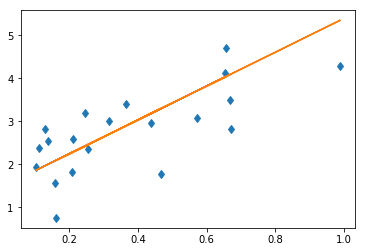

In [477]:
plt.plot(X_new, y_new, 'd')
plt.plot(X_new, y_fit)
plt.show()

#### R-square measurement on new data

In [478]:
round(r2_score(y_new,y_fit),3)

0.383

<br/><br/><br/>

### Working with too many features in linear regression
- Try Lasso regression

In [ ]:
# 1. bring in the estimator
from sklearn import linear_model
from sklearn.cross_validation import train_test_split

In [ ]:
my_lasso = linear_model.Lasso() # later try linear_model.Lasso(alpha = 0.1)

In [479]:
# 2. get data
from sklearn import datasets
# Load the diabetes dataset
diabetes = datasets.load_diabetes()

In [482]:
# if you want to use pandas
import pandas as pd
df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)

df['target'] = pd.DataFrame(diabetes.target)
df.head()



,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


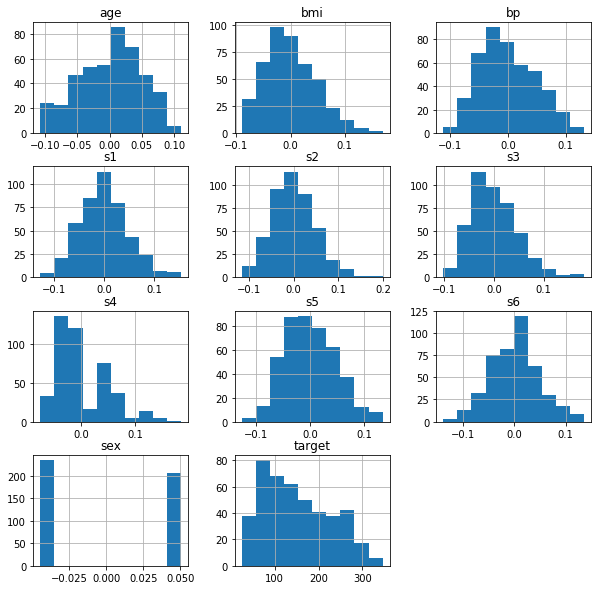

In [483]:
df.hist(figsize=(10, 10))
plt.show()

In [484]:
# correlation between all the variables
df.corr()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
age,1.000000,0.173737,0.185085,0.335427,0.260061,0.219243,-0.075181,0.203841,0.270777,0.301731,0.187889
sex,0.173737,1.000000,0.088161,0.241013,0.035277,0.142637,-0.379090,0.332115,0.149918,0.208133,0.043062
bmi,0.185085,0.088161,1.000000,0.395415,0.249777,0.261170,-0.366811,0.413807,0.446159,0.388680,0.586450
bp,0.335427,0.241013,0.395415,1.000000,0.242470,0.185558,-0.178761,0.257653,0.393478,0.390429,0.441484
s1,0.260061,0.035277,0.249777,0.242470,1.000000,0.896663,0.051519,0.542207,0.515501,0.325717,0.212022
s2,0.219243,0.142637,0.261170,0.185558,0.896663,1.000000,-0.196455,0.659817,0.318353,0.290600,0.174054
s3,-0.075181,-0.379090,-0.366811,-0.178761,0.051519,-0.196455,1.000000,-0.738493,-0.398577,-0.273697,-0.394789
s4,0.203841,0.332115,0.413807,0.257653,0.542207,0.659817,-0.738493,1.000000,0.617857,0.417212,0.430453
s5,0.270777,0.149918,0.446159,0.393478,0.515501,0.318353,-0.398577,0.617857,1.000000,0.464670,0.565883
s6,0.301731,0.208133,0.388680,0.390429,0.325717,0.290600,-0.273697,0.417212,0.464670,1.000000,0.382483


C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  


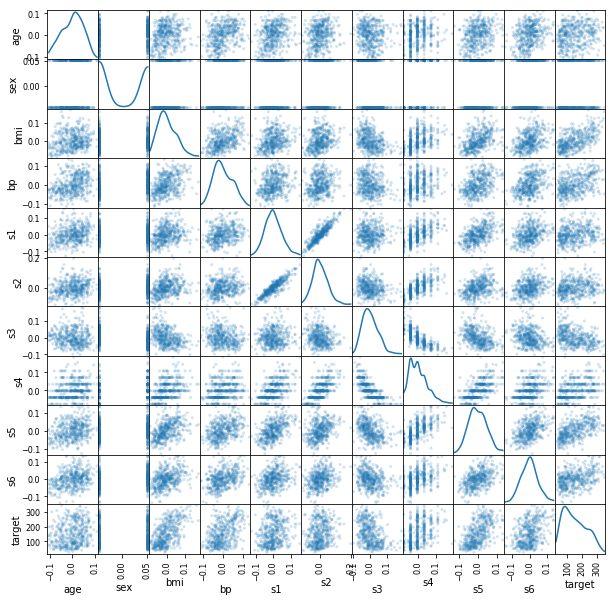

In [485]:
from pandas.tools.plotting import scatter_matrix
scatter_matrix(df, alpha=0.2, figsize=(10, 10), diagonal='kde')
plt.show()

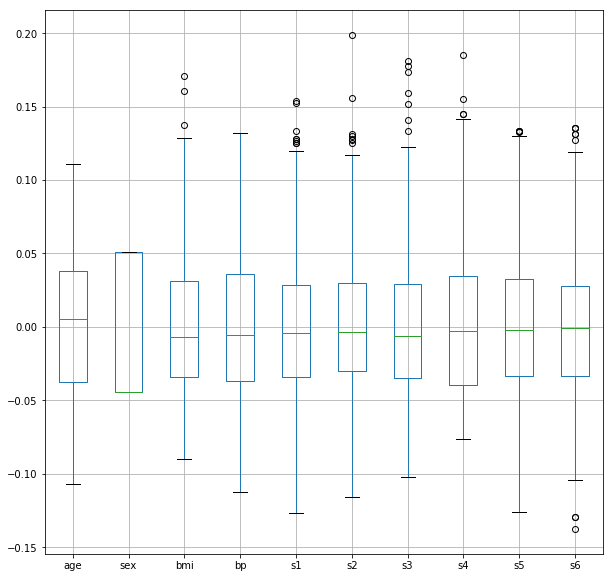

In [487]:
# box plot of predictors
# help me

dff = df.iloc[:,0:10]
dff.boxplot(figsize=(10, 10))
plt.show()

In [ ]:
# do a 70 30 split
x_train, x_test, y_train, y_test = train_test_split(diabetes.data, diabetes.target,test_size=0.3)

In [488]:
# 3. fit the model
my_lasso.fit(x_train, y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [489]:
# Make predictions using the testing set
y_pred = my_lasso.predict(x_test)

In [492]:
# The coefficients for each feature

coeff_features = pd.DataFrame(zip(diabetes.feature_names,my_lasso.coef_)).T # how to print horizontally
coeff_features

# way to hide index display
coeff_features.style.set_table_styles([
    {'selector': '.row_heading, .blank', 'props': [('display', 'none;')]}
])

# print('Coefficients: \n', my_lasso.coef_)
# print(diabetes.feature_names)

,0,1,2,3,4,5,6,7,8,9
0,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
1,0,-0,399.495,0,0,0,-0,0,284.651,0


In [493]:
from sklearn.metrics import r2_score

In [494]:
# R-Square
print('Explained variance: %.2f' % r2_score(y_test, y_pred))

Explained variance: 0.37


<br/><br/><br/><br/>

### Activity: House Price Prediction
- Boston housing dataset

In [495]:
# 1. bring in the estimator
from sklearn import linear_model
from sklearn.cross_validation import train_test_split

In [496]:
# model instance
my_lasso = linear_model.Lasso()

In [511]:
boston_data1 = datasets.load_boston()
boston_data1?

In [497]:
# get the dataset
boston_data = datasets.load_boston()

In [498]:
df = pd.DataFrame(boston_data.data, columns=boston_data.feature_names)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [499]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [500]:
df['target'] = pd.DataFrame(boston_data.target)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [ ]:
df.hist(figsize=(10, 10))
plt.show()

C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  


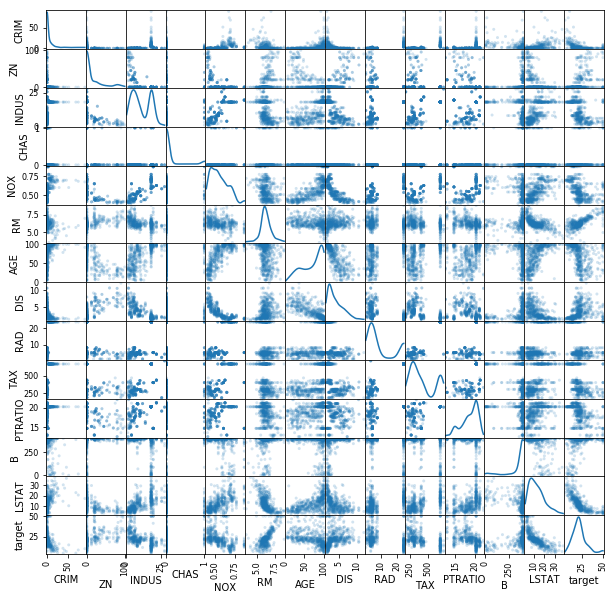

In [501]:
from pandas.tools.plotting import scatter_matrix
scatter_matrix(df, alpha=0.2, figsize=(10, 10), diagonal='kde')
plt.show()

In [502]:
# do a 60 40 split
# then try 80 20 split
x_train, x_test, y_train, y_test = train_test_split(boston_data.data, boston_data.target,test_size=0.4)

In [503]:
# 3. fit the model
my_lasso.fit(x_train, y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [504]:
# The intercept and coefficients
print my_lasso.intercept_

for features, coeffs in zip(boston_data.feature_names,my_lasso.coef_):
    print 'coefficient of {} is {}'.format(features, coeffs)

41.8977021711
coefficient of CRIM is -0.0272427255935
coefficient of ZN is 0.0435643349764
coefficient of INDUS is -0.0
coefficient of CHAS is 0.0
coefficient of NOX is -0.0
coefficient of RM is 0.81050881494
coefficient of AGE is 0.0
coefficient of DIS is -0.680642173713
coefficient of RAD is 0.239499005807
coefficient of TAX is -0.0141287996317
coefficient of PTRATIO is -0.68751415132
coefficient of B is 0.00822324214979
coefficient of LSTAT is -0.714459844763


In [506]:
pd.DataFrame(zip(boston_data.feature_names,my_lasso.coef_)).T

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
1,-0.0272427,0.0435643,-0,0,-0,0.810509,0,-0.680642,0.239499,-0.0141288,-0.687514,0.00822324,-0.71446


In [507]:
# predict the prices on test set and compare with actual prices
# Make predictions using the testing set
y_pred = my_lasso.predict(x_test)

In [508]:
# R-Square
print('R-Squared: %.2f' % r2_score(y_test, y_pred))

R-Squared: 0.71


In [513]:
# MSE
np.mean((y_pred- y_test)**2)

25.6645622316843

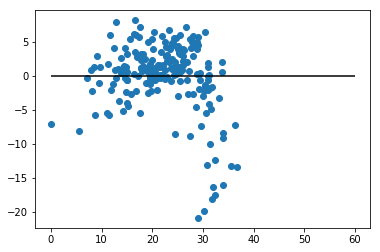

In [514]:
# residue plots
plt.scatter(y_pred, y_pred - y_test)
plt.hlines(y = 0, xmin=0, xmax = 60)
plt.show()

### Let's try a classification algorithm

### Logistic Regression

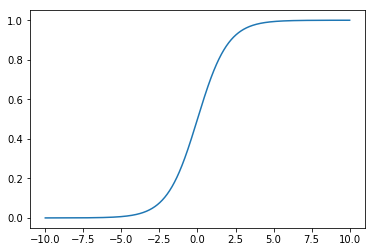

In [515]:
def sigmoid(x):
    a = []
    for item in x:
        a.append(1/(1+np.exp(-item)))
    return a

x = np.linspace(-10, 10,1000)

plt.plot(x,sigmoid(x)) # sigmoid applied on x values
plt.show()

##### Iris dataset 
task : learn (train a model) on a portion of the Iris data

Question: given a trained model, how well can we predict the remaining labels? 

In [516]:
# 1. bring in the estimator
from sklearn import linear_model

In [517]:
# model instance with a hyper parameter
logistic = linear_model.LogisticRegression()

C : float, default: 1.0

Inverse of regularization strength; must be a positive float. 
Like in support vector machines, smaller values specify stronger regularization

http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [527]:
# 2. get data
from sklearn import datasets
# Load the iris dataset
iris = datasets.load_iris()
iris?
# do iris.<tab> to see what it contains

In [528]:
# data and target needs to be fetched

iris_X = iris.data

iris_y = iris.target

In [529]:
# unique classes in target
classes, counts = np.unique(iris_y, return_counts=True)
print classes
print counts

[0 1 2]
[50 50 50]


In [530]:
class_names = iris.target_names

In [531]:
# create a train test split
from sklearn.cross_validation import train_test_split
np.random.seed(0)
iris_X_train, iris_X_test, iris_y_train, iris_y_test  = train_test_split(iris_X, iris_y,test_size=0.3 )

In [532]:
# 3. fit your model now
logistic.fit(iris_X_train, iris_y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [533]:
# 4. predict on your test
y_pred = logistic.predict(iris_X_test)
y_pred

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 2, 1, 0, 0, 2, 2, 0,
       0, 2, 0, 0, 1, 1, 0, 2, 2, 0, 2, 2, 2, 0, 2, 1, 1, 2, 0, 2, 0, 0])

In [534]:
# how to print out the probabilities

for prob, actual, pred in zip(logistic.predict_proba(iris_X_test), iris_y_test, y_pred):
    print 'for label {} we predicted {} with probabilities {}'.format(actual, pred, prob)

for label 2 we predicted 2 with probabilities [ 0.00101113  0.16996554  0.82902333]
for label 1 we predicted 1 with probabilities [ 0.02776905  0.8192578   0.15297315]
for label 0 we predicted 0 with probabilities [  9.35274816e-01   6.47142182e-02   1.09655940e-05]
for label 2 we predicted 2 with probabilities [  2.43222343e-04   3.77537968e-01   6.22218810e-01]
for label 0 we predicted 0 with probabilities [  8.55979967e-01   1.43942429e-01   7.76033315e-05]
for label 2 we predicted 2 with probabilities [  3.30823866e-04   1.40185623e-01   8.59483553e-01]
for label 0 we predicted 0 with probabilities [  8.88856426e-01   1.11090011e-01   5.35632321e-05]
for label 1 we predicted 1 with probabilities [ 0.02548902  0.64158276  0.33292821]
for label 1 we predicted 1 with probabilities [ 0.01204693  0.6883449   0.29960816]
for label 1 we predicted 1 with probabilities [ 0.07379901  0.73732211  0.18887887]
for label 2 we predicted 2 with probabilities [ 0.000639    0.39244423  0.60691677]
f

In [535]:
# put it as a dataframe
pd.DataFrame(zip(logistic.predict_proba(iris_X_test), iris_y_test, y_pred), 
             columns=['probabilities', 'actual_label', 'pred_label'])

# setosa', 'versicolor', 'virginica'

,probabilities,actual_label,pred_label
0,"[0.00101113414436, 0.169965540511, 0.829023325...",2,2
1,"[0.0277690499776, 0.819257798685, 0.152973151338]",1,1
2,"[0.935274816254, 0.0647142181525, 1.0965593991...",0,0
3,"[0.000243222342875, 0.377537967651, 0.62221881...",2,2
4,"[0.855979967432, 0.143942429237, 7.76033314503...",0,0
5,"[0.000330823865899, 0.140185622769, 0.85948355...",2,2
6,"[0.888856425874, 0.111090010894, 5.3563232149e...",0,0
7,"[0.0254890232233, 0.641582763714, 0.332928213063]",1,1
8,"[0.0120469320721, 0.688344903446, 0.299608164482]",1,1
9,"[0.0737990135144, 0.737322112284, 0.188878874202]",1,1


In [536]:
# 5. Evaluate
from sklearn.metrics import accuracy_score
score = accuracy_score( iris_y_test, y_pred)
round(score, 3)

0.889

In [538]:
# Compute confusion matrix
from sklearn.metrics import confusion_matrix, classification_report

In [539]:
print classification_report(iris_y_test, y_pred, target_names=class_names)

             precision    recall  f1-score   support

     setosa       1.00      1.00      1.00        16
 versicolor       1.00      0.72      0.84        18
  virginica       0.69      1.00      0.81        11

avg / total       0.92      0.89      0.89        45



In [540]:
# a plotting function for confusion matrix
# http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[16  0  0]
 [ 0 13  5]
 [ 0  0 11]]


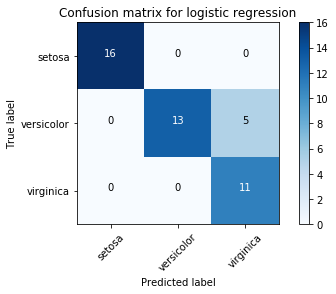

In [541]:
plt.figure()

cnf_matrix = confusion_matrix(iris_y_test, y_pred)
cnf_matrix

plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix for logistic regression')
plt.show()

#### Comapre classification using logistic regression with an unsupervised technique

### Clustering

In [542]:
# 1. estimator
from sklearn.cluster import KMeans

In [543]:
# 2. get the dataset
from sklearn import datasets
iris = datasets.load_iris()
X = pd.DataFrame(iris.data)

y_target = pd.DataFrame(iris.target)

In [544]:
X.head()

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [545]:
y_target.head()

,0
0,0
1,0
2,0
3,0
4,0


In [546]:
col_names = iris.feature_names
print col_names

target_labels = iris.target_names
print target_labels

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']


In [547]:
X.columns = col_names
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [548]:
y_target.columns = ['Labels']

In [549]:
# we set seed for reproducibility
np.random.seed(0)

0
1
2


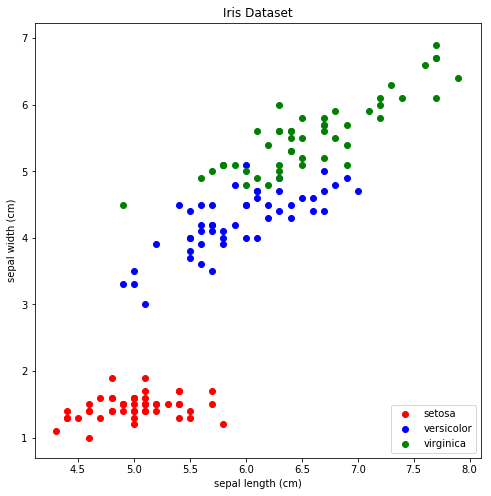

In [550]:
plt.figure(figsize=(8,8))

for target in set(iris.target):
    print target
    x = [iris.data[i,0] for i in range(len(iris.target)) if iris.target[i]==target]
    y = [iris.data[i,2] for i in range(len(iris.target)) if iris.target[i]==target]
    plt.scatter(x, y, color=['red', 'blue', 'green'][target], label=iris.target_names[target])
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.title('Iris Dataset')
plt.legend(iris.target_names, loc='lower right')
plt.show()

In [ ]:
plt.figure(figsize=(8,8))

for target in set(iris.target):
    print target
    x = [iris.data[i,0] for i in range(len(iris.target)) if iris.target[i]==target]
    y = [iris.data[i,2] for i in range(len(iris.target)) if iris.target[i]==target]
    plt.scatter(x, y, color=['red', 'blue', 'green'][target], label=iris.target_names[target])
plt.xlabel(iris.feature_names[2])
plt.ylabel(iris.feature_names[3])
plt.title('Iris Dataset')
plt.legend(iris.target_names, loc='lower right')
plt.show()

In [551]:
# instantiate a model
cluster_model = KMeans(n_clusters=3)

In [552]:
# 3. fit your model now
cluster_model.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [553]:
cluster_model.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 0,
       2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [554]:
# 4. Evaluate
from sklearn.metrics import accuracy_score
y_pred = np.choose(cluster_model.labels_, [1, 0, 2]).astype('int')
round(accuracy_score(y_target, y_pred),3)

0.893

In [555]:
cnf_matrix_kmeans = confusion_matrix(y_target, y_pred)
cnf_matrix_kmeans

array([[50,  0,  0],
       [ 0, 48,  2],
       [ 0, 14, 36]], dtype=int64)

Confusion matrix, without normalization
[[50  0  0]
 [ 0 48  2]
 [ 0 14 36]]


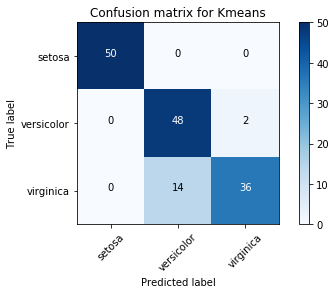

In [556]:
plot_confusion_matrix(cnf_matrix_kmeans, classes=target_labels,
                      title='Confusion matrix for Kmeans')
plt.show()

## Machine Learning Models Cheat Sheet

## Estimators

Given a scikit-learn *estimator* object named `model`, the following methods are available:

- Available in **all Estimators**
  + `model.fit()` : fit training data. For supervised learning applications,
    this accepts two arguments: the data `X` and the labels `y` (e.g. `model.fit(X, y)`).
    For unsupervised learning applications, this accepts only a single argument,
    the data `X` (e.g. `model.fit(X)`).
- Available in **supervised estimators**
  + `model.predict()` : given a trained model, predict the label of a new set of data.
    This method accepts one argument, the new data `X_new` (e.g. `model.predict(X_new)`),
    and returns the learned label for each object in the array.
  + `model.predict_proba()` : For classification problems, some estimators also provide
    this method, which returns the probability that a new observation has each categorical label.
    In this case, the label with the highest probability is returned by `model.predict()`.
  + `model.score()` : for classification or regression problems, most (all?) estimators implement
    a score method.  Scores are between 0 and 1, with a larger score indicating a better fit.
- Available in **unsupervised estimators**
  + `model.predict()` : predict labels in clustering algorithms.
  + `model.transform()` : given an unsupervised model, transform new data into the new basis.
    This also accepts one argument `X_new`, and returns the new representation of the data based
    on the unsupervised model.
  + `model.fit_transform()` : some estimators implement this method,
    which more efficiently performs a fit and a transform on the same input data.

### References

1. Credits: Forked from [PyCon 2015 Scikit-learn Tutorial](https://github.com/jakevdp/sklearn_pycon2015) by Jake VanderPlas

2. <a href='http://nbviewer.jupyter.org/github/donnemartin/data-science-ipython-notebooks/blob/master/scikit-learn/scikit-learn-intro.ipynb'>source</a>
3. Python Data Science Handbook by Jake VanderPlas
4. plot issues: https://stackoverflow.com/questions/35105781/missing-labels-in-matplotlib-scatter-plot-legend


Good discussion on stackoverflow on regularization
https://stackoverflow.com/questions/22851316/what-is-the-inverse-of-regularization-strength-in-logistic-regression-how-shoul